In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tgihdataset/Participants_Data_TGIH/Sample Submission.csv
/kaggle/input/tgihdataset/Participants_Data_TGIH/Train.csv
/kaggle/input/tgihdataset/Participants_Data_TGIH/Test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/tgihdataset/Participants_Data_TGIH/Train.csv')
test_df = pd.read_csv('/kaggle/input/tgihdataset/Participants_Data_TGIH/Test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [5]:
import time

# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special, stats

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score


# SMOTe
from imblearn.over_sampling import SMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


# metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score, precision_recall_curve 
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ensemble
from xgboost import XGBClassifier

# warnings
import warnings
warnings.filterwarnings("ignore")

# style
import matplotlib.style as style
style.use('fivethirtyeight')

print("All libraries are imported...")

All libraries are imported...


In [6]:
# train = pd.read_csv('/kaggle/input/tgihdataset/Participants_Data_TGIH/Train.csv')

In [7]:
def get_df_shape(train, test):
    print("Train shape: ", train.shape)
    print("Test shape: ", test.shape)

get_df_shape(train_df, test_df)

Train shape:  (284780, 8)
Test shape:  (122049, 7)


In [8]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


# Data Dictionary

| Invoice No - Invoice ID, encoded as Label            |   |
|------------------------------------------------------|---|
| StockCode - Unique code per stock, encoded as Label  |   |
| Description - The Description, encoded as Label      |   |
| Quantity - Quantity purchased                        |   |
| InvoiceDate - Date of purchase                       |   |
| UnitPrice - The target value, price of every product |   |
| CustomerID - Unique Identifier for every country     |   |
| Country - Country of sales, encoded as Label         |   |

In [9]:
train_df.nunique()

# InvoiceNo and InvoiceDate has highest number of unique values

InvoiceNo      20971
StockCode       3619
Description     3819
Quantity         373
InvoiceDate    19451
UnitPrice        524
CustomerID      4339
Country           37
dtype: int64

# Basic Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0c644cf90>,
      dtype=object)

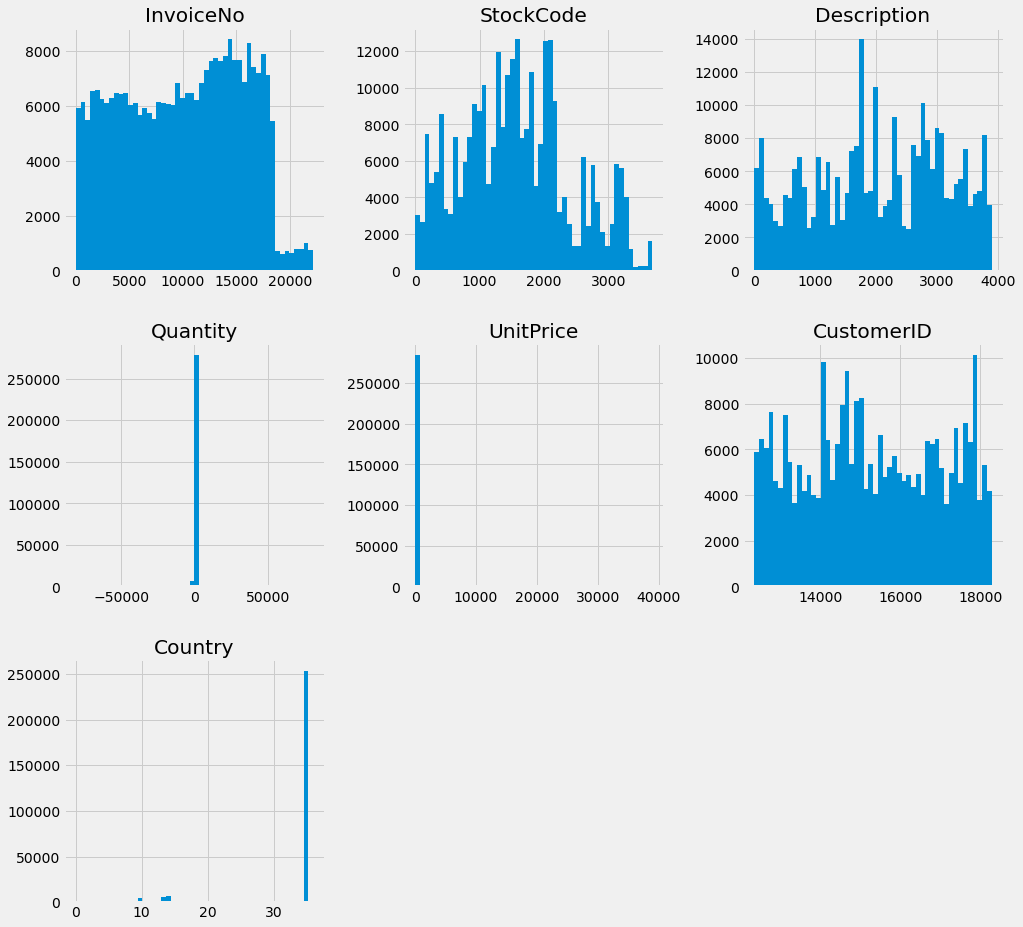

In [10]:
train_df.hist(bins=50, figsize=(15,15))

# Observations
# 1. InvoiceNo is normally distributed
# 2. StockCode is normally distributed
# 3. Description is normally distributed
# 4. CustomerId is normally distributed

# Let us analyse other columns more closely

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0c5d6ffd0>,
      dtype=object)

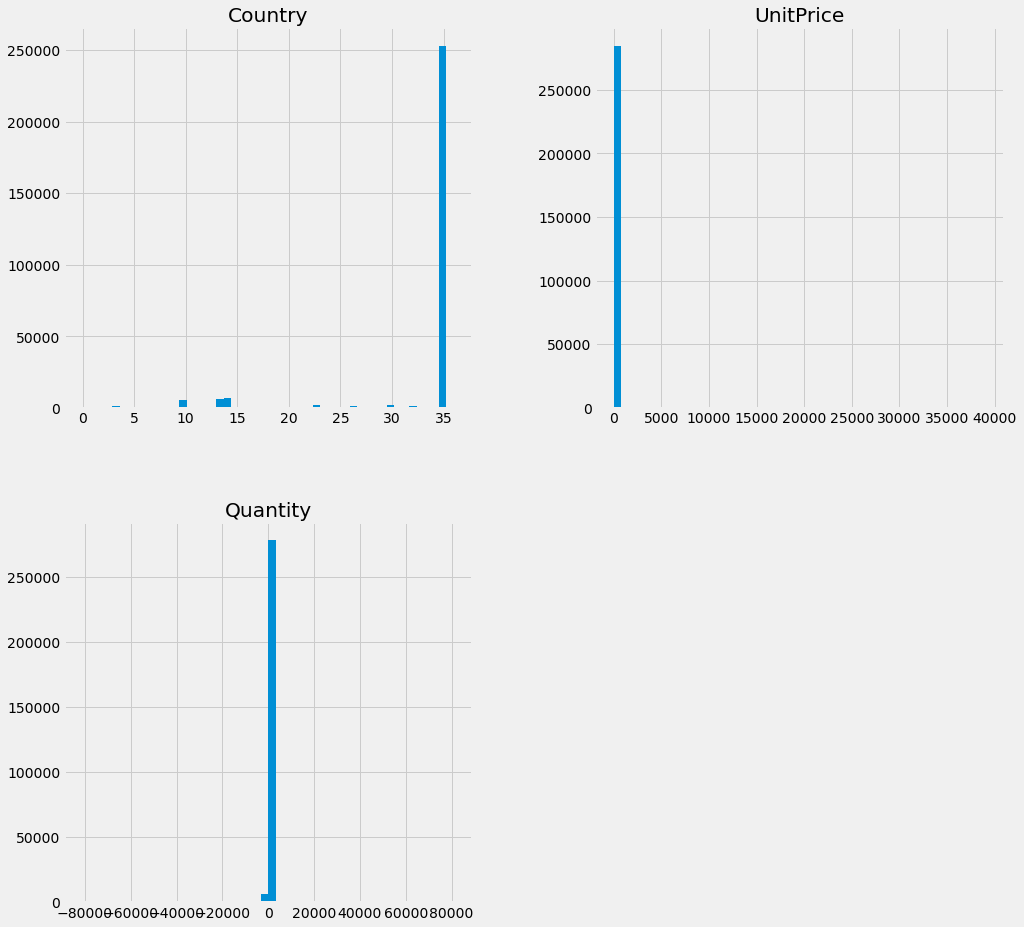

In [11]:
train_df[['Country', 'UnitPrice', 'Quantity']].hist(bins=50, figsize=(15,15))
# We will have to use boxplot to determine the range of 'UnitPrice' and 'Quantity'

In [12]:
print(train_df[['UnitPrice', 'Quantity']].quantile(0.95).T)
print(train_df[['UnitPrice', 'Quantity']].quantile(0.99).T)

# we can also use describe() here
train_df[['UnitPrice', 'Quantity']].describe().T

UnitPrice     8.5
Quantity     36.0
Name: 0.95, dtype: float64
UnitPrice     15.0
Quantity     120.0
Name: 0.99, dtype: float64


,count,mean,std,min,25%,50%,75%,max
UnitPrice,284780.0,3.451216,78.399541,0.0,1.25,1.95,3.75,38970.0
Quantity,284780.0,12.028468,295.111588,-80995.0,2.00,5.00,12.00,80995.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0c59a5750>,
      dtype=object)

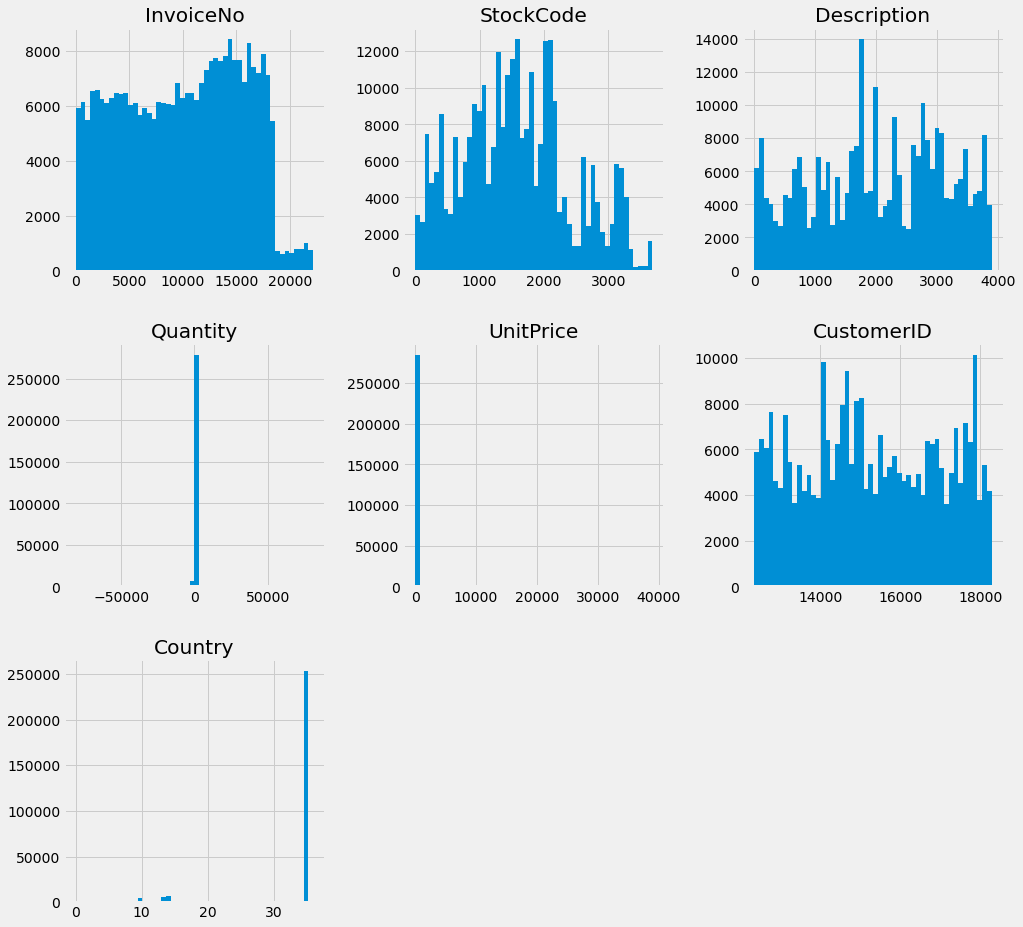

In [13]:
train_df.hist(bins=50, figsize=(15,15))


# Null value check

In [14]:
# Check for null values if any

# This method shows the count of null values, percent and dataTypes

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    tt['Types'] = types
    return(np.transpose(tt))

In [15]:
missing_data(train_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Total,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,object,float64,float64,int64


In [16]:
missing_data(test_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
Total,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,object,float64,int64


# Baseline model - Simple Random Forest

In [17]:
y = train_df['UnitPrice']
X = train_df.copy()
X = X.drop('UnitPrice', axis=1)

print(X.shape, y.shape)
X.head()

(284780, 7) (284780,)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,13952.0,35


In [18]:
X = X.drop(['InvoiceDate','CustomerID'], axis=1)
X.head()

,InvoiceNo,StockCode,Description,Quantity,Country
0,6141,1583,144,3,35
1,6349,1300,3682,6,35
2,16783,2178,1939,4,35
3,16971,2115,2983,1,35
4,6080,1210,2886,12,35


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(227824, 5) (56956, 5) (227824,) (56956,)


In [20]:
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [21]:
y_pred = rf_reg.predict(X_val)
print(y_pred.shape)

(56956,)


In [22]:
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_val, y_pred)))
print('R2 score', r2_score(y_val, y_pred))

Mean Absolute Error: 1.3856597654747722
Mean Squared Error: 27725.17261185822
Root Mean Squared Error: 166.50877638088096
R2 score 0.03164834155897345


# Addressing Skewness

In [23]:
train_df.skew()

InvoiceNo       -0.079704
StockCode        0.271247
Description     -0.133967
Quantity         0.226115
UnitPrice      438.340508
CustomerID       0.029524
Country         -3.050125
dtype: float64

In [24]:
Unitprice = train_df['Quantity'].values.reshape(-1,1)
Quantity = train_df['Quantity'].values.reshape(-1,1)
Country = train_df['Country'].values.reshape(-1,1)


from sklearn.preprocessing import PowerTransformer

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)

train_df['Quantity'] = power.fit_transform(Quantity)
train_df['Country'] = power.fit_transform(Country)
train_df['UnitPrice'] = power.fit_transform(Unitprice)

y = train_df['UnitPrice']
X = train_df.copy()
X = X.drop('UnitPrice', axis=1)

print(X.shape, y.shape)
X.head()

(284780, 7) (284780,)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,6141,1583,144,-0.031586,2011-05-06 16:54:00,14056.0,0.347751
1,6349,1300,3682,-0.021362,2011-05-11 07:35:00,13098.0,0.347751
2,16783,2178,1939,-0.028183,2011-11-20 13:20:00,15044.0,0.347751
3,16971,2115,2983,-0.038367,2011-11-22 12:07:00,15525.0,0.347751
4,6080,1210,2886,-0.000816,2011-05-06 09:00:00,13952.0,0.347751


In [25]:
train_df[['Quantity','UnitPrice', 'Country']].skew()

# Skewness before power transform

# Quantity         0.226115
# UnitPrice      438.340508
# Country         -3.050125

Quantity     64.325177
UnitPrice    64.325177
Country      -2.554575
dtype: float64

In [26]:
y.head()

0   -0.031586
1   -0.021362
2   -0.028183
3   -0.038367
4   -0.000816
Name: UnitPrice, dtype: float64

In [27]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,-0.031586,2011-05-06 16:54:00,-0.031586,14056.0,0.347751
1,6349,1300,3682,-0.021362,2011-05-11 07:35:00,-0.021362,13098.0,0.347751
2,16783,2178,1939,-0.028183,2011-11-20 13:20:00,-0.028183,15044.0,0.347751
3,16971,2115,2983,-0.038367,2011-11-22 12:07:00,-0.038367,15525.0,0.347751
4,6080,1210,2886,-0.000816,2011-05-06 09:00:00,-0.000816,13952.0,0.347751


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0c5cbdd90>,
      dtype=object)

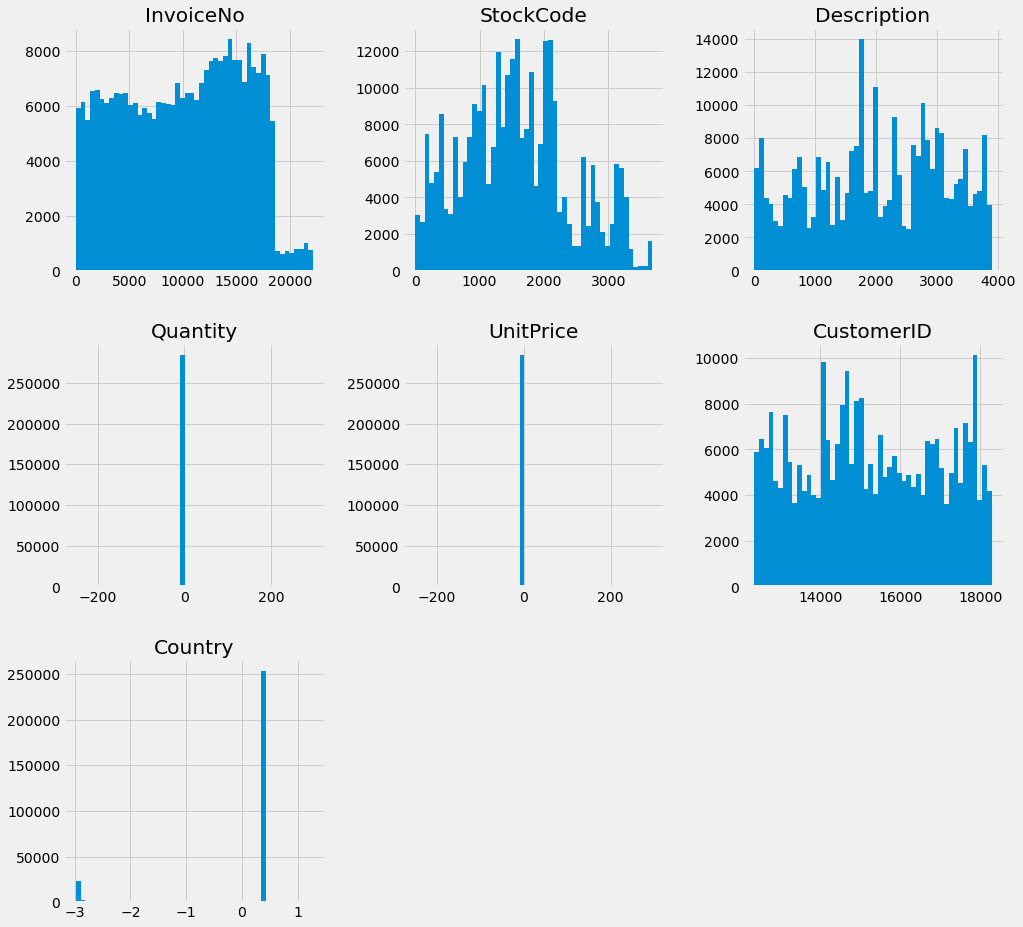

In [28]:
train_df.hist(bins=50, figsize=(15,15))

In [29]:
X = X.drop(['InvoiceDate','CustomerID'], axis=1)
X.head()

,InvoiceNo,StockCode,Description,Quantity,Country
0,6141,1583,144,-0.031586,0.347751
1,6349,1300,3682,-0.021362,0.347751
2,16783,2178,1939,-0.028183,0.347751
3,16971,2115,2983,-0.038367,0.347751
4,6080,1210,2886,-0.000816,0.347751


In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(227824, 5) (56956, 5) (227824,) (56956,)


In [31]:
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=2021)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=2021)

In [32]:
y_pred = rf_reg.predict(X_val)
print(y_pred.shape)

(56956,)


In [33]:
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_val, y_pred)))
print('R2 score', r2_score(y_val, y_pred))

Mean Absolute Error: 0.001609940197287627
Mean Squared Error: 0.14032648020282937
Root Mean Squared Error: 0.3746017621459213
R2 score 0.8744613340706442


## NOTE
### `Power Transformation` helped us tackle the skewness in the target variable

### Evaluating for overfitting, we will check the score for training set

In [34]:
y_pred_train = rf_reg.predict(X_train)
print(y_pred_train.shape)

(227824,)


In [35]:
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))  
print('Mean Squared Error:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R2 score', r2_score(y_train, y_pred_train))

Mean Absolute Error: 0.0006903352514404041
Mean Squared Error: 0.03306554719897189
Root Mean Squared Error: 0.18183934447465402
R2 score 0.9659308922887481


In [36]:
X.head()

,InvoiceNo,StockCode,Description,Quantity,Country
0,6141,1583,144,-0.031586,0.347751
1,6349,1300,3682,-0.021362,0.347751
2,16783,2178,1939,-0.028183,0.347751
3,16971,2115,2983,-0.038367,0.347751
4,6080,1210,2886,-0.000816,0.347751


### Checking for duplicates

In [47]:
def check_duplicates(data):
    has_dup = data.duplicated()
    true_dup = np.where(has_dup == True)
    if len(true_dup[0]) > 0:
        print("Data has", len(true_dup[0]), "duplicates")
    else:
        print("No duplicates found !!!")

check_duplicates(train_df)
check_duplicates(test_df)

Data has 2651 duplicates
Data has 508 duplicates


# Submitting test results

In [37]:
test_df.skew()

InvoiceNo      -0.076200
StockCode       0.266920
Description    -0.132740
Quantity      -26.063548
CustomerID      0.030557
Country        -3.059695
dtype: float64

In [48]:
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [49]:
test_data = test_df.copy()
test_data = test_data.drop(['InvoiceDate','CustomerID'], axis=1)
test_data.head()


,InvoiceNo,StockCode,Description,Quantity,Country
0,3139,1709,1079,3,35
1,617,510,3457,1,35
2,14653,604,694,36,35
3,8634,1478,3473,2,35
4,15546,3216,871,1,35


In [50]:
results = rf_reg.predict(test_data)


In [51]:
results

array([ 3.0056692 ,  1.00639912, 34.24125005, ...,  6.17020404,
        1.00639912,  3.00140664])

In [52]:
results = pd.DataFrame(data=results).round(2)
results.head()

,0
0,3.01
1,1.01
2,34.24
3,1.98
4,1.01


In [ ]:
results.to_csv("tgih_results.csv")